In [10]:
# Import the numpy and pandas package
import numpy as np
import pandas as pd

# Read the given CSV file, and view some sample records
Titanic_passengers = pd.read_csv("data/train.csv")
Titanic_passengers



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [11]:
dummies1 = pd.get_dummies(Titanic_passengers.Sex)
dummies2 = pd.get_dummies(Titanic_passengers.Embarked)
merged = pd.concat([Titanic_passengers, dummies1,dummies2], axis='columns')
Titanic_passengers = merged.drop(['Sex','Embarked','Cabin','Ticket'], axis='columns')
# Shape of our dataset
Titanic_passengers.shape

# Info our dataset
Titanic_passengers.info()

# Describe our dataset
Titanic_passengers.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   female       891 non-null    uint8  
 9   male         891 non-null    uint8  
 10  C            891 non-null    uint8  
 11  Q            891 non-null    uint8  
 12  S            891 non-null    uint8  
dtypes: float64(2), int64(5), object(1), uint8(5)
memory usage: 60.2+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.352413,0.647587,0.188552,0.086420,0.722783
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.477990,0.477990,0.391372,0.281141,0.447876
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,0.000000,1.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


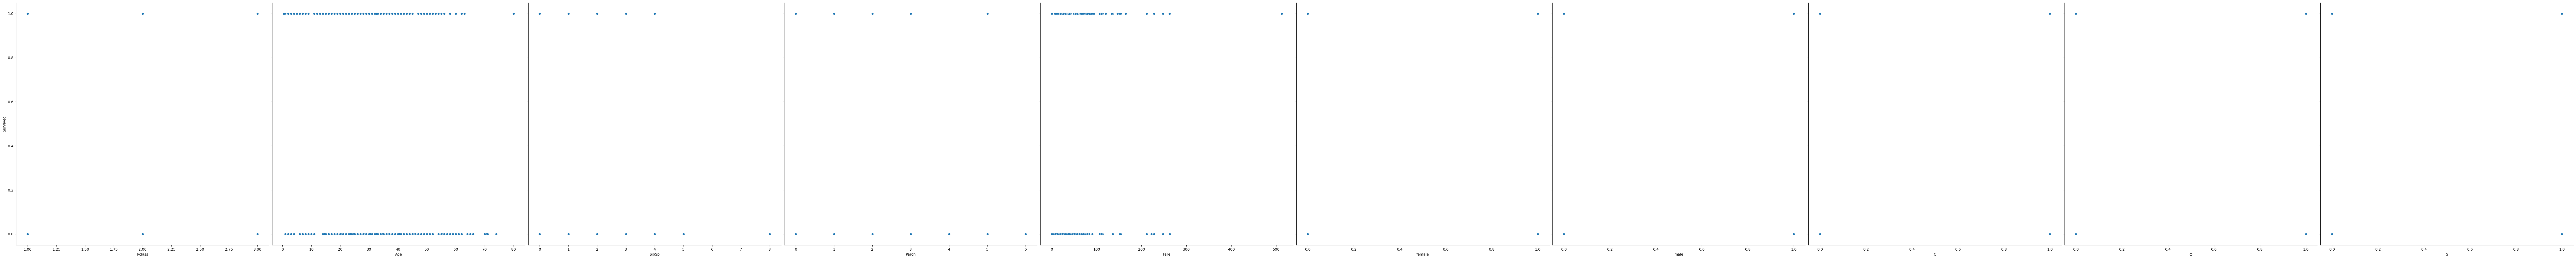

In [13]:
import matplotlib.pyplot as plt 
import seaborn as sns

# Using pairplot we'll visualize the data for correlation
sns.pairplot(Titanic_passengers, x_vars=['Pclass','Age','SibSp','Parch','Fare','female','male','C','Q','S'], 
             y_vars='Survived', height=10, aspect=1, kind='scatter')
plt.show()

C:\Users\ravik\AppData\Local\Temp\ipykernel_10480\4117519808.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Titanic_passengers.corr(), cmap="YlGnBu", annot = True)


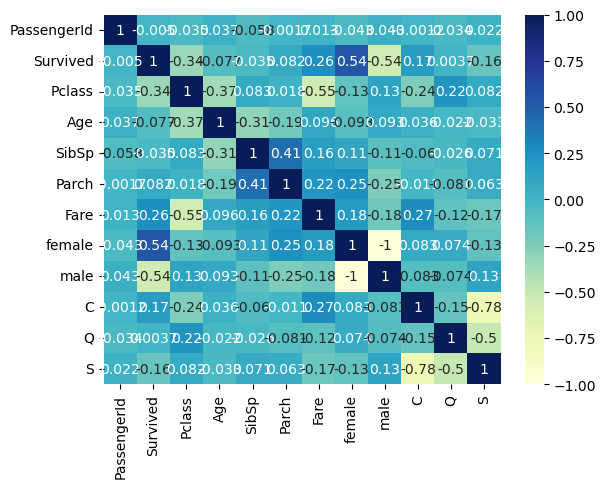

In [14]:
# Visualizing the data using heatmap
sns.heatmap(Titanic_passengers.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [ ]:
#PERFORMING Y= C+mX
X = Titanic_passengers['female']
y = Titanic_passengers['Survived']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)
